# 6.2 Evaluation Metric Scores

### 6.2.1 Calculating the Metrics

In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


In [30]:
def metric_calcul(metrics):
    mean_metric = []
    for metric in metrics.columns:
        mean = metrics[metric].mean()
        mean_metric.append(mean)
    return mean_metric

def mean_metrics(m):
    m1 = metric_calcul(m)
    m2 = []
    for imp_mean in m1:
        m2.append(np.mean(imp_mean))
    return m2

def metrics_printer(m):
    names = ['Accuracy', 'Precision', 'Recall', 'f1_score']
    for i, metric in enumerate(mean_metrics(m)):
        print(f'Mean of Performance metric {names[i]}:\t {metric}')

In [31]:
#Decision Metrics
metrics_dtree = pd.read_csv('metrics_dtree.csv')

metrics_printer(metrics_dtree)

Mean of Performance metric Accuracy:	 0.9718814398162224
Mean of Performance metric Precision:	 0.97436011970909
Mean of Performance metric Recall:	 0.9718814398162224
Mean of Performance metric f1_score:	 0.9719535753523486


In [32]:
# KNN Tree Metrics
metrics_knn = pd.read_csv('metrics_knn.csv')

metrics_printer(metrics_knn)

Mean of Performance metric Accuracy:	 0.8185584946454512
Mean of Performance metric Precision:	 0.8272482427722729
Mean of Performance metric Recall:	 0.8185584946454512
Mean of Performance metric f1_score:	 0.8193853139744962


In [33]:
# Logistic Regression Metrics
metrics_logreg = pd.read_csv('metrics_logreg.csv')

metrics_printer(metrics_logreg)

Mean of Performance metric Accuracy:	 0.9870933414411674
Mean of Performance metric Precision:	 0.9881731473035821
Mean of Performance metric Recall:	 0.9870933414411674
Mean of Performance metric f1_score:	 0.987204241726609


In [34]:
# Random Forests Metrics
metrics_rf = pd.read_csv('metrics_rf.csv')

metrics_printer(metrics_rf)

Mean of Performance metric Accuracy:	 1.0
Mean of Performance metric Precision:	 1.0
Mean of Performance metric Recall:	 1.0
Mean of Performance metric f1_score:	 1.0


In [35]:
# SVM Metrics
metrics_svm = pd.read_csv('metrics_svm.csv')

metrics_printer(metrics_svm)

Mean of Performance metric Accuracy:	 0.9841073781291173
Mean of Performance metric Precision:	 0.9853379420498986
Mean of Performance metric Recall:	 0.9841073781291173
Mean of Performance metric f1_score:	 0.984173307758821


### 6.2.2 Visualization

Text(0.5, 0.98, 'Comparison of the Precision Metrics various ML Models ')

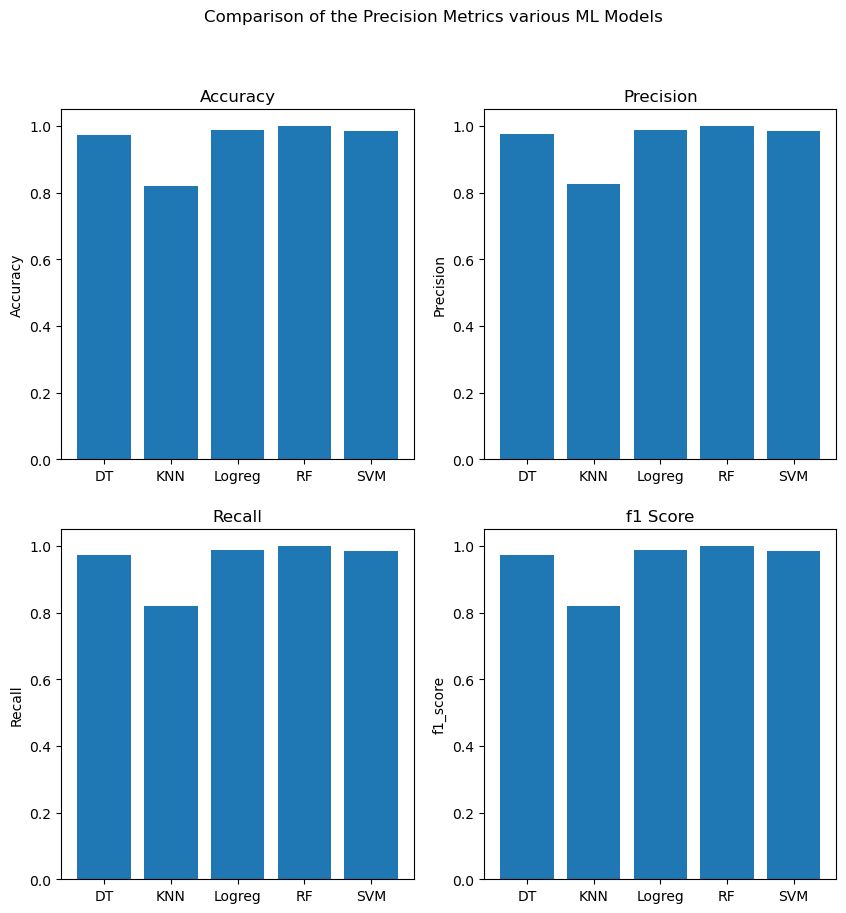

In [41]:
def dict_maker(metric):
        mean = []
        keys = []
        names = ['Accuracy', 'Precision', 'Recall', 'f1_score']
        for i, metric in enumerate(mean_metrics(metric)):
            mean.append(metric)
            keys.append(names[i])
        dictionary = dict(zip(keys, mean))
        return dictionary


dict_dtree = dict_maker(metrics_dtree)
dict_knn = dict_maker(metrics_knn)
dict_logreg = dict_maker(metrics_logreg)
dict_rf = dict_maker(metrics_rf)
dict_svm = dict_maker(metrics_svm)
     

def dict_concat(d1, d2, d3, d4, d5):
    dicto = {'Accuracy': [],
             'Precision': [],
             'Recall': [],
             'f1_score': []}
    for key, values in d1.items():
        dicto[key].append(values)
    for key, values in d2.items():
        dicto[key].append(values)
    for key, values in d3.items():
        dicto[key].append(values)    
    for key, values in d4.items():
        dicto[key].append(values)
    for key, values in d5.items():
        dicto[key].append(values)
    return dicto          

dictionary = dict_concat(dict_dtree, dict_knn, dict_logreg, dict_rf, dict_svm)     

labels = ['DT', 'KNN', 'Logreg', 'RF', 'SVM']

fig, ax = plt.subplots(nrows= 2, ncols= 2, figsize = (10,10))
ax[0,0].bar(range(len(dictionary['Accuracy'])), dictionary['Accuracy'])
ax[0,0].set_xticks(range(len(dictionary['Accuracy'])))
ax[0,0].set_xticklabels(labels)
ax[0,0].set_ylabel('Accuracy')
ax[0,0].set_title('Accuracy')
ax[0,1].bar(range(len(dictionary['Precision'])), dictionary['Precision'])
ax[0,1].set_xticks(range(len(dictionary['Accuracy'])))
ax[0,1].set_xticklabels(labels)
ax[0,1].set_ylabel('Precision')
ax[0,1].set_title('Precision')
ax[1,0].bar(range(len(dictionary['Recall'])), dictionary['Recall'])
ax[1,0].set_xticks(range(len(dictionary['Accuracy'])))
ax[1,0].set_xticklabels(labels)
ax[1,0].set_ylabel('Recall')
ax[1,0].set_title('Recall')
ax[1,1].bar(range(len(dictionary['f1_score'])), dictionary['f1_score'])
ax[1,1].set_xticks(range(len(dictionary['Accuracy'])))
ax[1,1].set_xticklabels(labels)
ax[1,1].set_ylabel('f1_score')
ax[1,1].set_title('f1 Score')

plt.suptitle('Comparison of the Precision Metrics various ML Models ')
